In [1]:
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', FutureWarning)
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(16,6)
plt.rcParams['figure.dpi'] = 300

## Time Series Modelling

In [2]:
# decomposing time series
# import libraries
import pandas as pd 
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# extract the price of gold from Quandl
df = quandl.get('WGC/GOLD_MONAVG_USD',
                start_date = '2011-1-1',
                end_date = '2020-6-10',
                api_key = 'UkBXz6sLeET-4uRJ-65q')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2011-01-31 to 2020-02-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   127 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [4]:
# rename the columns 
df.rename(columns={'Value':'price'},inplace=True)
# will get the last price of gold for each month
df = df.resample('M').last()

In [5]:
print(f'Shape of Data Frame : {df.shape}')
df.head()

Shape of Data Frame : (110, 1)


,price
Date,
2011-01-31,1356.40
2011-02-28,1372.73
2011-03-31,1424.01
2011-04-30,1473.81
2011-05-31,1510.44


In [6]:
# adding rolling mean and standard deviation()
df['rolling_mean'] = df.price.rolling(window=12).mean()
# gold volatility
df['rolling_std'] = df.price.rolling(window=12).std()
df.tail()

,price,rolling_mean,rolling_std
Date,,,
2019-10-31,1494.80,1352.408333,102.374082
2019-11-30,1470.02,1373.164167,98.473131
2019-12-31,1476.04,1392.174167,94.015138
2020-01-31,1560.67,1414.584167,99.775495
2020-02-29,1597.10,1437.670833,107.655986


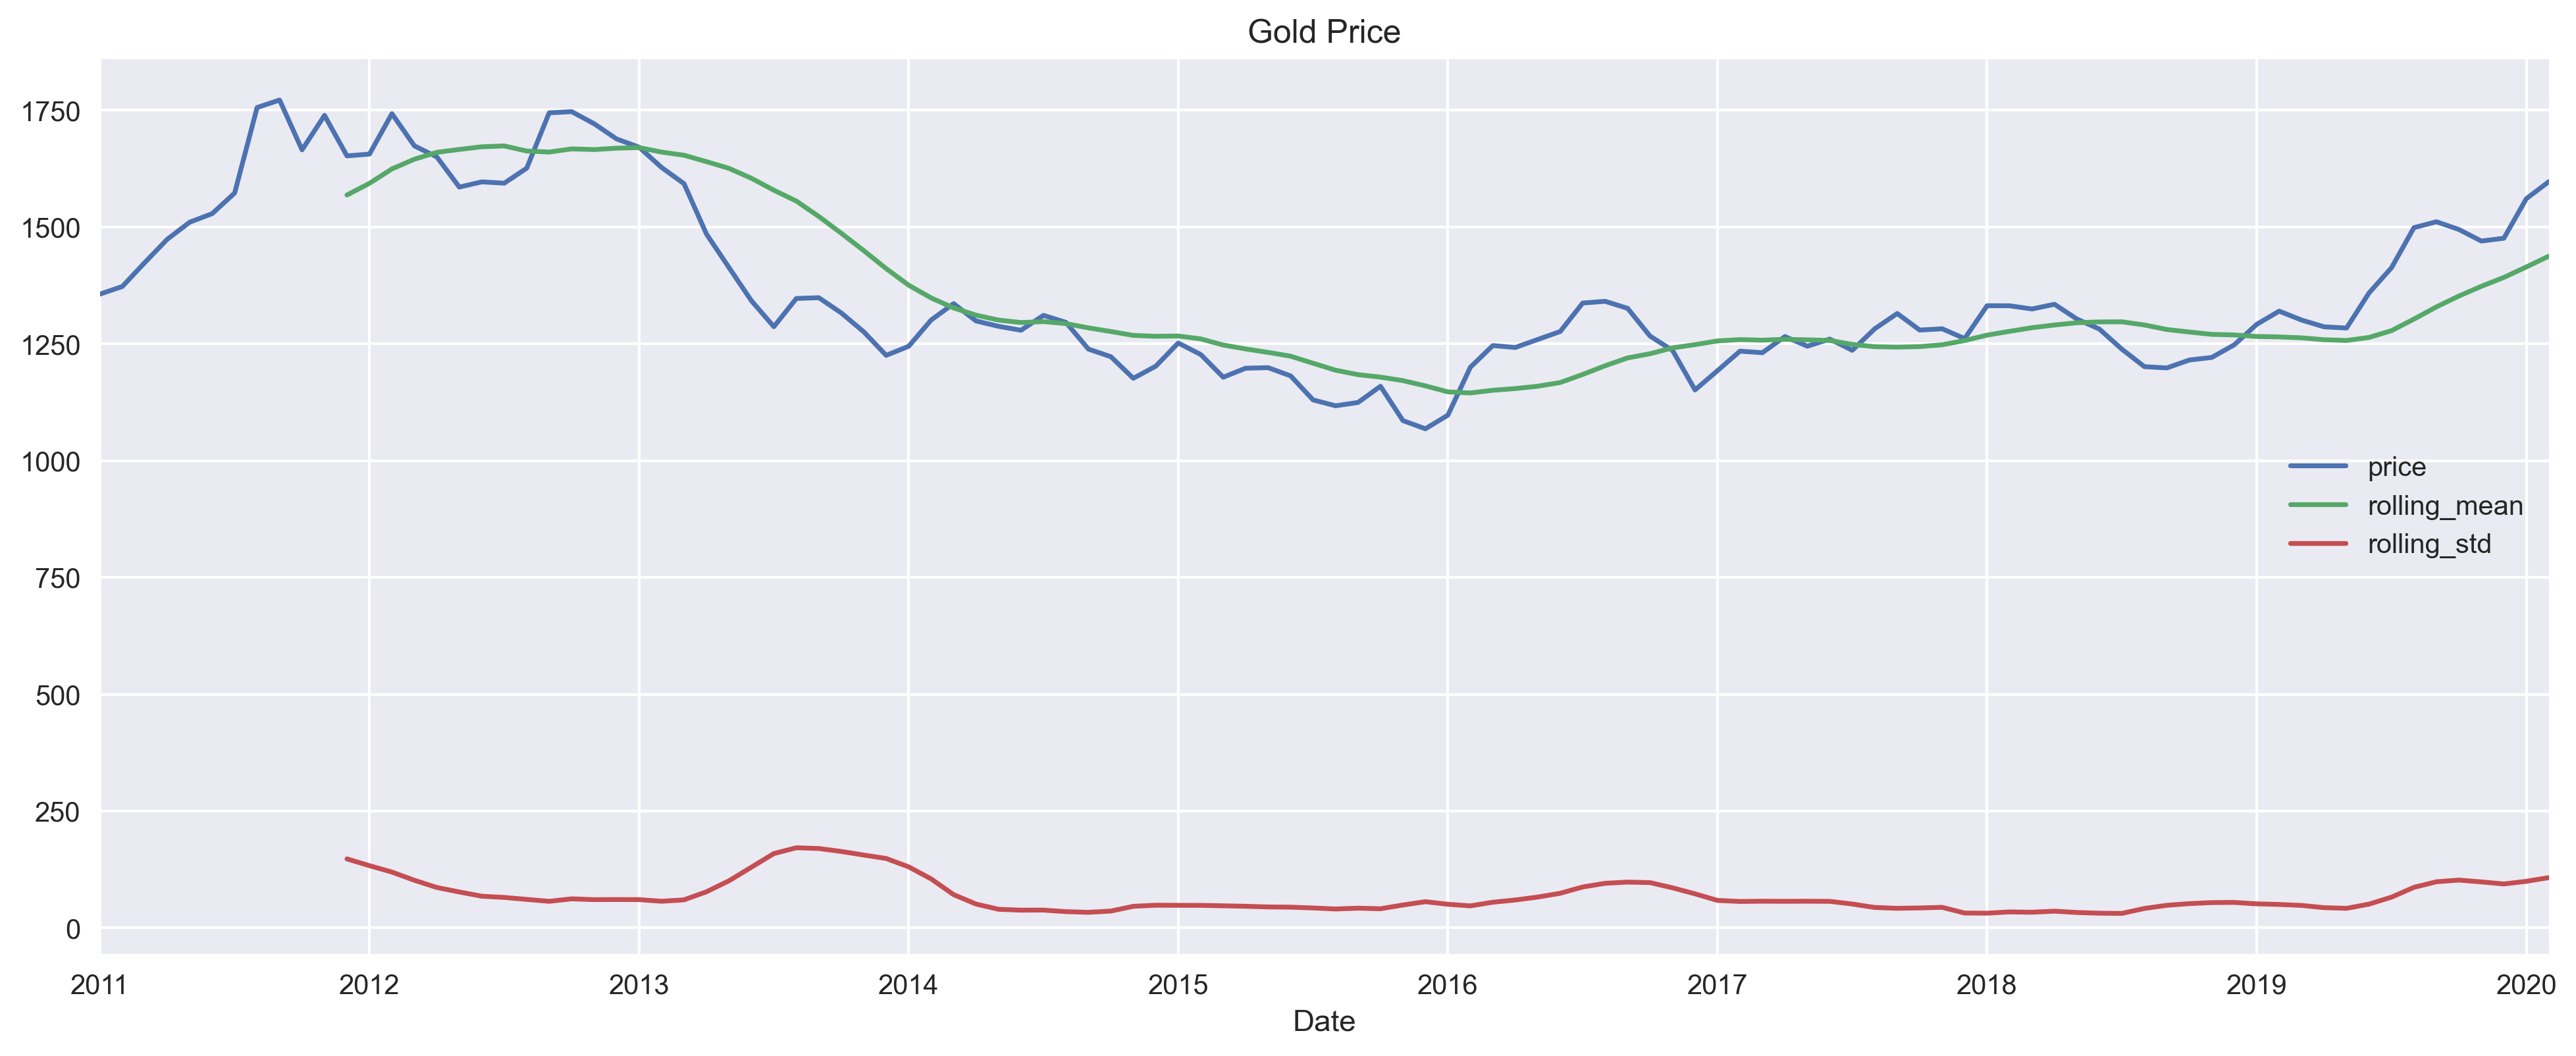

In [7]:
#plot the findings
df.plot(title='Gold Price')
plt.show()